In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [54]:
clusternames = ["adj_LumA", "adj_LumB", "adj_Basal", "adj_HER2Normal", "adj_PAM50Her2"]

gsea_frames = {}
for cluster in clusternames:
    df = pd.read_csv(f"GSEA_/{cluster}/gseapy.gsea.gene_set.report.csv", index_col=0).iloc[:,:-3]
    indexlist = []
    for i in df.index:
        new_i = i.rstrip(" ")
        indexlist.append(new_i)
    df.index = indexlist
    df['fdr'] = df.apply(lambda row: 5.0 if (row['fdr'] == 0.0) else -np.log10(row['fdr']), axis=1)
    df = df.loc[~df.index.duplicated(keep='first')]
    gsea_frames[cluster] = df
    
gsea_df = pd.DataFrame(index= gsea_frames['adj_LumA'].index)
for i in gsea_frames:
    gsea_df[i] = gsea_frames[i][f'fdr']

In [55]:
gsea_df

,adj_LumA,adj_LumB,adj_Basal,adj_HER2Normal,adj_PAM50Her2
Activation of APC/C and APC/C:Cdc20 mediated degradation of mitotic proteins,5.000000,3.717286,2.980772,5.000000,1.862473
Activation of ATR in response to replication stress,5.000000,3.720666,5.000000,5.000000,1.826592
Activation of the pre-replicative complex,5.000000,5.000000,5.000000,5.000000,2.800993
Amplification of signal from unattached kinetochores via a MAD2 inhibitory signal,5.000000,5.000000,5.000000,5.000000,2.318062
Amplification of signal from the kinetochores,5.000000,5.000000,5.000000,5.000000,2.233860
...,...,...,...,...,...
FGFR2c ligand binding and activation,0.001755,-0.000000,0.001019,0.055738,0.099992
Dopamine receptors,0.001112,0.509501,0.156339,0.283271,0.137842
G alpha (s) signalling events,0.001000,0.157043,0.100279,1.063548,0.036668
Activated point mutants of FGFR2,0.000802,0.032872,0.052504,0.035618,0.341935


In [56]:
gsea_df.columns = ["LumA", "LumB", "Basal", "Normal", "Her2"]
gsea_df

,LumA,LumB,Basal,Normal,Her2
Activation of APC/C and APC/C:Cdc20 mediated degradation of mitotic proteins,5.000000,3.717286,2.980772,5.000000,1.862473
Activation of ATR in response to replication stress,5.000000,3.720666,5.000000,5.000000,1.826592
Activation of the pre-replicative complex,5.000000,5.000000,5.000000,5.000000,2.800993
Amplification of signal from unattached kinetochores via a MAD2 inhibitory signal,5.000000,5.000000,5.000000,5.000000,2.318062
Amplification of signal from the kinetochores,5.000000,5.000000,5.000000,5.000000,2.233860
...,...,...,...,...,...
FGFR2c ligand binding and activation,0.001755,-0.000000,0.001019,0.055738,0.099992
Dopamine receptors,0.001112,0.509501,0.156339,0.283271,0.137842
G alpha (s) signalling events,0.001000,0.157043,0.100279,1.063548,0.036668
Activated point mutants of FGFR2,0.000802,0.032872,0.052504,0.035618,0.341935


In [57]:
wall_df = pd.read_csv("../exp/adjusted_distributions_PAM50.csv", index_col = 0)
wall_df = wall_df.iloc[:, [0, 1, 2, 3, 4]]
wall_df.columns = ["LumA", "LumB", "Her2", "Normal", "Basal"]
wall_df

,LumA,LumB,Her2,Normal,Basal
RHO GTPases Activate Formins,3.963590,0.995465,1.163591,3.021927,5.422721
Factors involved in megakaryocyte development and platelet production,3.963590,1.023093,1.955168,2.881715,4.784309
RHO GTPase Effectors,3.963590,1.133937,0.803294,3.095910,4.750884
EML4 and NUDC in mitotic spindle formation,3.963590,1.287602,1.161360,3.165939,4.931946
Kinesins,3.963590,1.424705,1.461955,2.855323,4.386029
...,...,...,...,...,...
Role of ABL in ROBO-SLIT signaling,0.301409,2.976070,0.996696,1.528871,0.357934
Transcriptional regulation of granulopoiesis,0.301409,1.641689,0.365430,0.350232,0.410021
Clathrin-mediated endocytosis,0.301409,0.555611,1.115075,0.337099,0.485192
STAT5 Activation,0.301293,1.025219,0.680057,0.654833,0.357934


In [59]:
wall_df_counts = {}

for column in wall_df.columns:
    columnshape = wall_df[wall_df[column] >= 3].shape[0]
    wall_df_counts[column] = columnshape
wall_df_counts

{'LumA': 68, 'LumB': 40, 'Her2': 59, 'Normal': 79, 'Basal': 216}

In [60]:
gsea_counts = {}

for column in gsea_df.columns:
    columnshape = gsea_df[gsea_df[column] >= 3].shape[0]
    gsea_counts[column] = columnshape
gsea_counts

{'LumA': 60, 'LumB': 234, 'Basal': 67, 'Normal': 223, 'Her2': 25}

C:\Users\patri\AppData\Roaming\Python\Python37\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


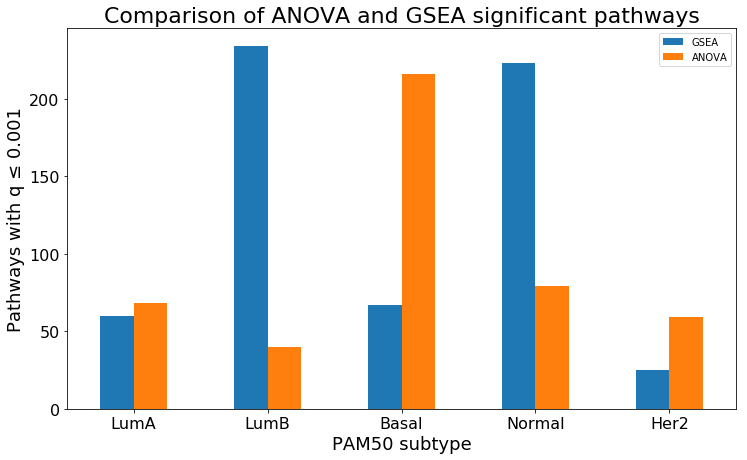

In [61]:
full_df = pd.DataFrame({'GSEA': gsea_counts, 'ANOVA': wall_df_counts})
ax = full_df.plot.bar(rot=0, figsize=(12, 7))
ax.set_xlabel("PAM50 subtype", fontsize=18)
ax.set_ylabel("Pathways with q ≤ 0.001", fontsize=18)
ax.set_title('Comparison of ANOVA and GSEA significant pathways', fontsize=22)
ax.tick_params(labelsize=16)
fig = ax.get_figure()
fig.show()

In [62]:
fig = ax.get_figure()
fig.savefig('gsea_wall_anova_PAM50_comparison.png')

In [63]:
compare_sig_pathways = {}
for i in gsea_df.columns:
    print(i)
    gsea_cluster = gsea_df[gsea_df[i] > 3].index.tolist()
    anova_cluster = wall_df[wall_df[i] > 3].index.tolist()
    count = 0
    for index in anova_cluster:
        if index in gsea_cluster:
            count += 1
    compare_sig_pathways[i] = count

compare_sig_pathways

LumA
LumB
Basal
Normal
Her2


{'LumA': 23, 'LumB': 4, 'Basal': 49, 'Normal': 40, 'Her2': 0}

In [64]:
venn_dict = {}
for i in compare_sig_pathways.keys():
    venn_list = [wall_df_counts[i]-compare_sig_pathways[i], gsea_counts[i] - compare_sig_pathways[i], compare_sig_pathways[i]]
    venn_dict[i] = venn_list
venn_dict 

{'LumA': [45, 37, 23],
 'LumB': [36, 230, 4],
 'Basal': [167, 18, 49],
 'Normal': [39, 183, 40],
 'Her2': [59, 25, 0]}

In [65]:
overlap_df = pd.DataFrame(index = gsea_counts.keys())
overlap_df['Overlap'] = compare_sig_pathways.values()
overlap_df['GSEA'] = gsea_counts.values() 
overlap_df['ANOVA'] = wall_df_counts.values() 
overlap_df['GSEA exclusive'] = overlap_df['GSEA'] - overlap_df['Overlap']
overlap_df['ANOVA exclusive'] = overlap_df['ANOVA'] - overlap_df['Overlap']

overlap_df

,Overlap,GSEA,ANOVA,GSEA exclusive,ANOVA exclusive
LumA,23,60,68,37,45
LumB,4,234,40,230,36
Basal,49,67,59,18,10
Normal,40,223,79,183,39
Her2,0,25,216,25,216
